In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_model = os.path.join(pth_data, 'modeling')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_model, 'predict', 'CCCA.h5ad'))
adata

AnnData object with n_obs × n_vars = 1406087 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'core

In [4]:
adata_ls = sc.read_h5ad(os.path.join(pth_model, 'landscape', 'CCCA.h5ad'))
adata_ls

AnnData object with n_obs × n_vars = 8460 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores',

In [5]:
adata.obs['landscape'] = adata.obs_names.isin(adata_ls.obs_names).astype(str)
adata

AnnData object with n_obs × n_vars = 1406087 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'core

In [6]:
names = ['Data_He2021_Prostate',
         'Data_Maynard2020_Lung',
         'Data_Puram2017_Head-and-Neck',
         'Data_Karaayvas2018_Breast',
         'Data_Filbin2018_Brain',
         'Data_Gojo2020_Brain',
         'Data_Hovestadt2019_Brain',
         'Data_Neftel2019_Brain',
         'Data_Tirosh2016_Brain',
         'Data_Venteicher2017_Brain',
         'Data_Jerby-Arnon2018_Skin']

# import seaborn as sns
# coldict = {'Data_Gojo2020_Brain' : ['cell_subtype']}
# col = 'cluster_assignment'

# for name, sdf in (adata.obs.groupby('Name', observed = True)
#                   .filter(lambda sdf: sdf.name in names)
#                   .groupby('Name', observed = True)):

#     for col in adata.obs.columns:

#             if not pd.to_numeric(sdf[col], errors = 'coerce').notna().any():

#             if sdf[col].nunique() > 1:

#                 print(name)
#                 print(col)

#                 ctab = pd.crosstab(sdf.landscape, sdf[col]).T

#                 plt.figure(figsize = (10, 10))
#                 sns.heatmap(ctab, square = True)
#                 plt.show()

In [ ]:
# tf = pd.read_csv(os.path.join('..', '..', 'data', 'refs', 'Mus_musculus_TF'), sep = '\t').Symbol
# tf = tf[tf.isin(adata.var_names)].values

# adata.obs['is_names'] = adata.obs.Name.isin(names)
adata_names = adata[adata.obs.Name.isin(names)].copy()
# adata_names.obs['complexity'] = adata_names.obs.complexity.astype(float)

# sc.tl.rank_genes_groups(adata_names, 'landscape')

# df = sc.get.rank_genes_groups_df(adata_names, 'True')

# df.head(10)


<Axes: xlabel='Zeb2', ylabel='Category'>

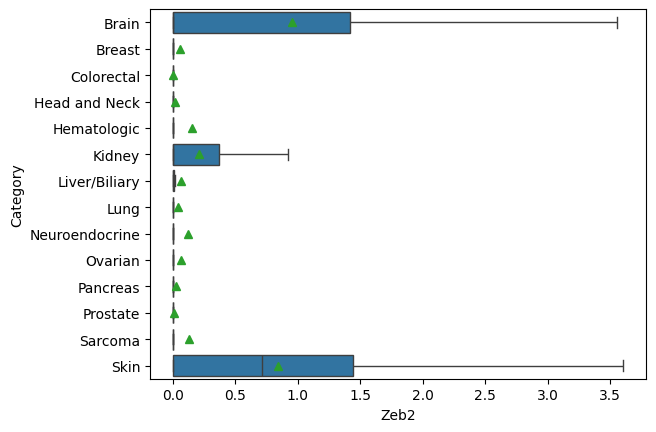

In [19]:
# plt.figure(figsize = (25, 5))

# adata.obs['Zeb2'] = adata[:, 'Zeb2'].X.toarray()

import seaborn as sns

sns.boxplot(adata.obs, y = 'Category', x = 'Zeb2', showfliers = False, showmeans = True)

# sc.pl.violin(adata, ['Zeb2'], 'Category')